In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'D:\HI448116_Santosh_Karpe\FY25\DOCS\III\Ass\ASA - SK\EastWestAirlines.csv')

# Check for missing values
data.isnull().sum()

# Option 1: Impute missing values (e.g., using the median for numerical columns)
data.fillna(data.median(), inplace=True)

# Option 2: Drop rows with missing values
# data.dropna(inplace=True)

In [ ]:
#Removing Outliers
#Outliers can distort clustering algorithms. 
#A common method to detect outliers is using the Z-score or IQR (Interquartile Range).

In [11]:
from scipy import stats

# Remove outliers using Z-score
z_scores = stats.zscore(data.select_dtypes(include=['float64', 'int64']))
data_no_outliers = data[(z_scores < 3).all(axis=1)]

In [ ]:
#Scaling Features
#For clustering algorithms like K-Means and DBSCAN, feature scaling is necessary.
#Use StandardScaler or MinMaxScaler to normalize or standardize the features.

In [12]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
#Exploratory Data Analysis (EDA)
#EDA helps you understand the distribution of the data and identify potential clusters.
#Use visualizations like scatter plots, pair plots, histograms, and box plots to explore the dataset.

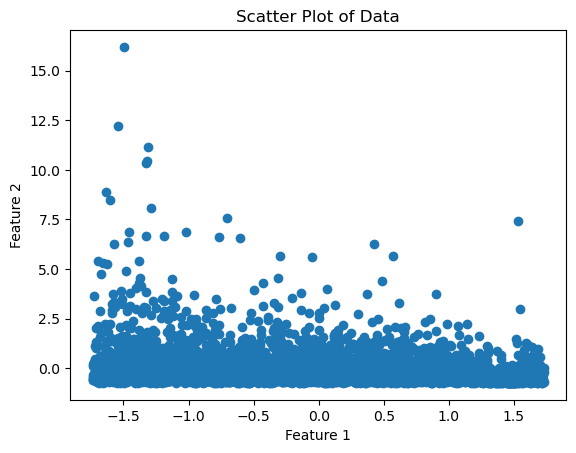

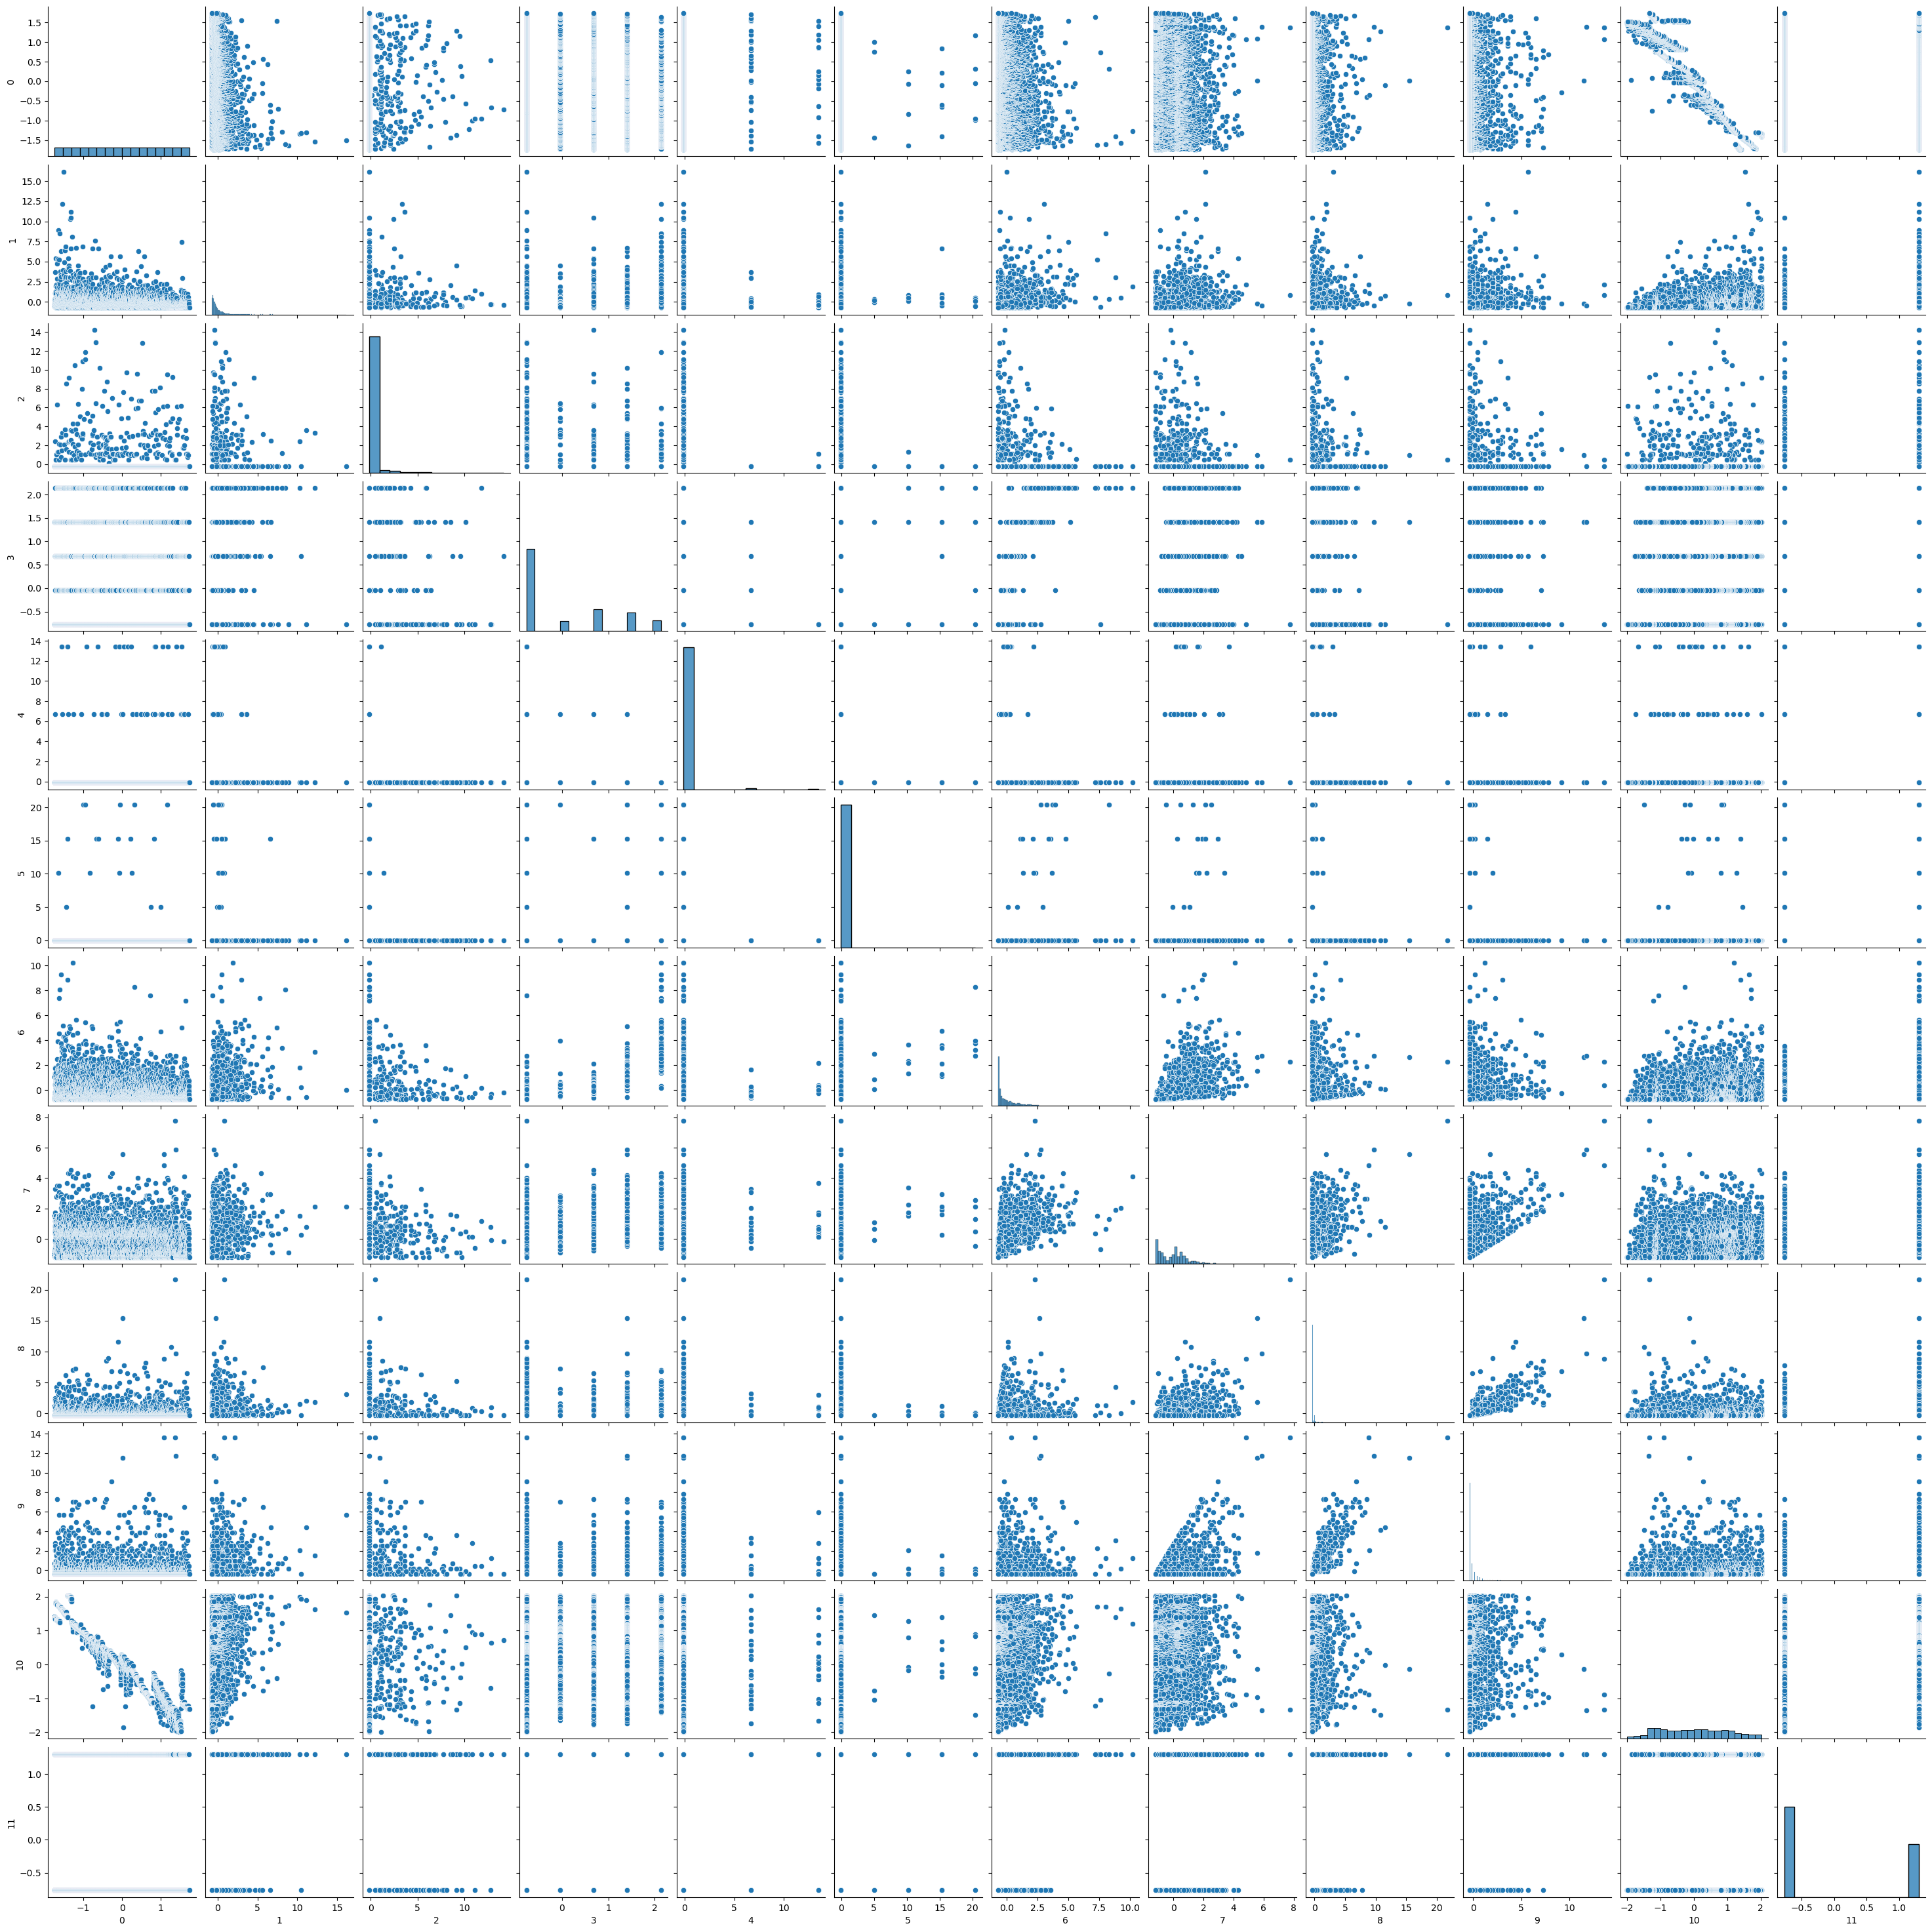

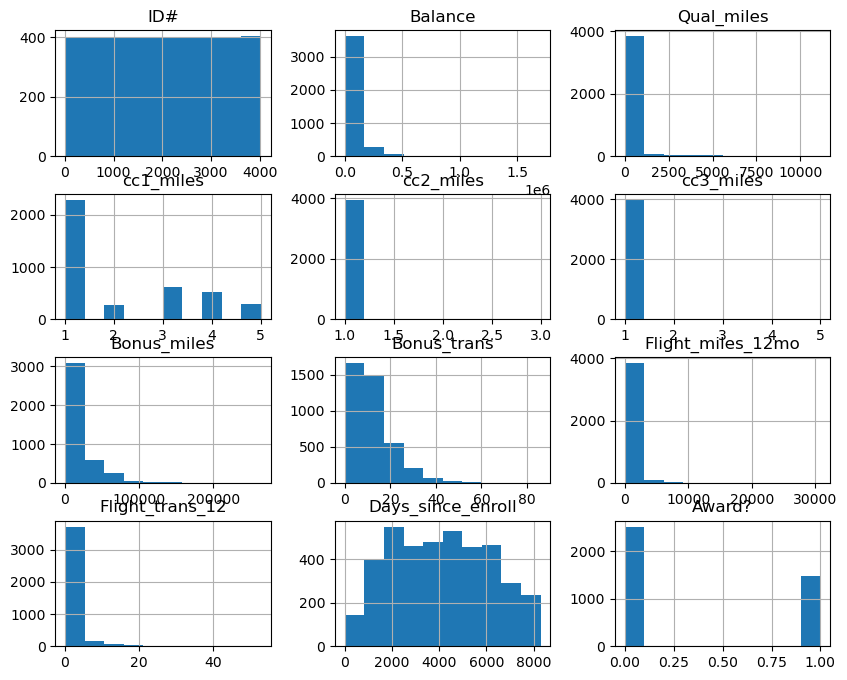

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of the data
plt.scatter(data_scaled[:, 0], data_scaled[:, 1])
plt.title("Scatter Plot of Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Pair plot to check the relationships between features
sns.pairplot(pd.DataFrame(data_scaled))
plt.show()

# Check the distribution of numerical features
data.hist(figsize=(10, 8))
plt.show()

In [ ]:
# Clustering Algorithms
# We will implement three clustering algorithms: K-Means, Hierarchical Clustering, and DBSCAN.
# K-Means Clustering
# K-Means clustering groups data points into a predefined number of clusters (K). 
# The value of K needs to be chosen, and the Elbow Method can help with that.

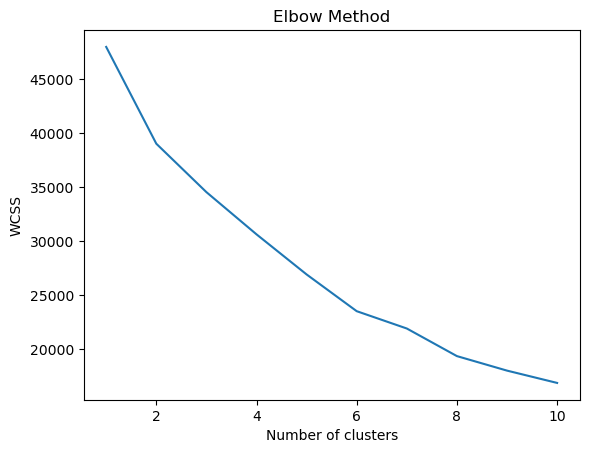

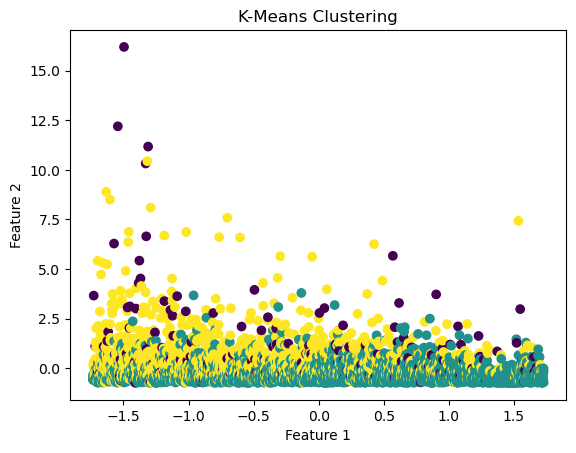

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with the optimal number of clusters
optimal_k = 3  # Adjust based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(data_scaled)

# Visualize the clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Hierarchical Clustering
# Hierarchical clustering creates a tree of clusters. 
# You can apply Agglomerative Clustering and use Dendrogram to decide the optimal number of clusters.

In [19]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 9.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 10.8 MB/s eta 0:00:01
   ------- -------------------------------- 2.0/11.0 MB 14.4 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/11.0 MB 16.3 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.0 MB 16.6 MB/s eta 0:00:01
   ----------------- ---------------------- 4.8/11.0 MB 17.1 MB/s eta 0:00:01
   ------------------- -------------------- 5.4/11.0 MB 16.4 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.0 MB 16.1 MB/s eta 0:00:01
   ------------------------ --------------- 6.7/11.0 MB 16.4 MB/s eta 0:00:01
   --------------------------- ------------ 7.5/11.0 MB 16.0 MB/s eta 0:00:01
   -

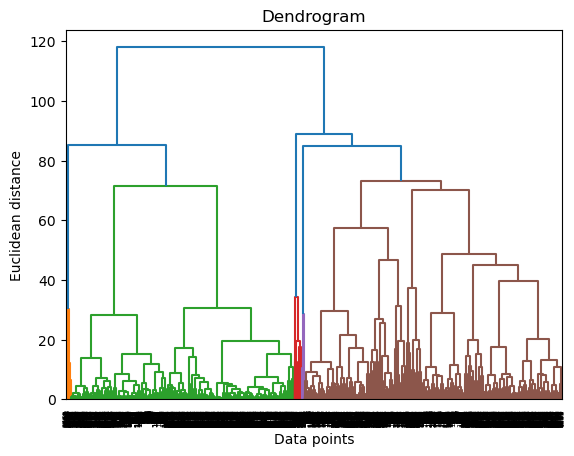

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [20]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrogram to determine the number of clusters
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

# Apply Hierarchical clustering with the optimal number of clusters
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(data_scaled)

# Visualize the clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=y_hc, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# DBSCAN
# DBSCAN is a density-based clustering algorithm that does not require the number of clusters to be specified.
# It requires two parameters: epsilon (radius for a neighborhood) and minPts (minimum number of points to form a cluster).

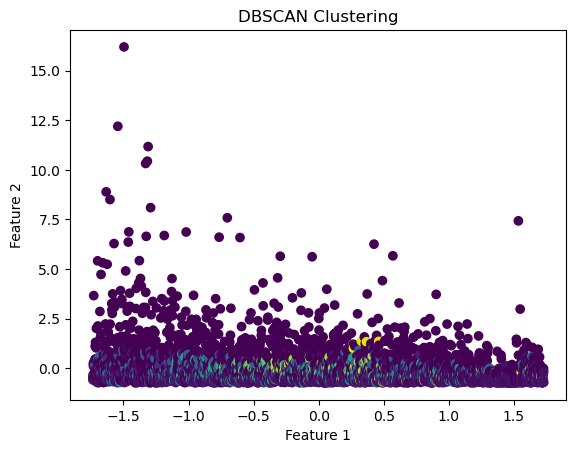

In [16]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(data_scaled)

# Visualize the clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Cluster Analysis and Interpretation
# After clustering, you need to analyze and interpret the results:
# K-Means: The algorithm assigns each data point to one of the K clusters. 
# The centroids of each cluster represent the mean position of the data points within the cluster.
# Hierarchical Clustering: It creates a tree-like structure, and the cutting point on the dendrogram determines the number of clusters.
# Each level of the tree represents different levels of similarity between clusters.
# DBSCAN: DBSCAN identifies clusters based on density.
# It’s good for datasets with noise and irregularly shaped clusters, and it can also identify outliers (points that don't belong to any cluster).

In [ ]:
# Evaluation and Performance Metrics
# To evaluate clustering results,
# we can use metrics like Silhouette Score, which measures how similar an object is to its own cluster compared to other clusters.

In [17]:
from sklearn.metrics import silhouette_score

# K-Means Silhouette Score
silhouette_kmeans = silhouette_score(data_scaled, y_kmeans)
print(f'Silhouette Score (K-Means): {silhouette_kmeans:.4f}')

# DBSCAN Silhouette Score
silhouette_dbscan = silhouette_score(data_scaled, y_dbscan)
print(f'Silhouette Score (DBSCAN): {silhouette_dbscan:.4f}')

Silhouette Score (K-Means): 0.2812
Silhouette Score (DBSCAN): -0.2823


In [ ]:
# Interpretation of Silhouette Score:
# The score ranges from -1 to 1.
# A score close to 1 indicates that the points are well clustered.
# A score close to 0 indicates overlapping clusters.
# A score close to -1 indicates that the points are incorrectly clustered.